In [14]:
import networkx as nx
from utils import plot_graph, plot_solution
from kruskal import PointedStructure, UnionFind, kruskal 
from prim import prim
import numpy as np

# Initializing a simple testing graph

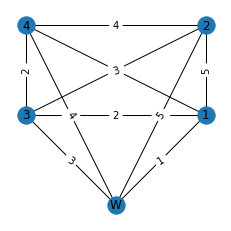

In [2]:
g = nx.Graph()

g.add_node("W", pos=(1,0))
g.add_node("1", pos=(2,1))
g.add_node("2", pos=(2,2))
g.add_node("3", pos=(0,1))
g.add_node("4", pos=(0,2))

g.add_weighted_edges_from([["W", "1", 1], ["W", "2", 5], ["W", "3", 3], 
                           ["W", "4", 4], ["1", "2", 5], ["1", "3", 2],
                           ["1", "4", 5], ["2", "3", 3], ["2", "4", 4], ["3", "4", 2]])
                          
plot_graph(g)

In [8]:
sol_k = kruskal(g)
sol_p = prim(g)

print(sol_k)
print(sol_p)

[('W', '1'), ('1', '3'), ('3', '4'), ('2', '3')]
[('W', '1'), ('3', '2'), ('1', '3'), ('3', '4')]


# Read data from file

In [10]:
import sys

def read(data_file):
    data_file = open(data_file)
    # first line is total number of vertices in file and number of edges
    (nb_v, nb_e) = data_file.readline().split(' ')

    print("expected number of vertices : {0}".format(nb_v))
    print("expected number of edges : {0}\n".format(nb_e))
    
    g = nx.Graph()

    # each line contains an edge
    for line in data_file:
        (start, end, cost) = line[:-1].split(' ')
        g.add_weighted_edges_from([[str(start),str(end),int(cost)]])
        #print("edge from {0} to {1} with cost {2}".format(start, end, cost))
    return(g)
        
g_test = read("data/edges.txt")

print("number of vertices : ",len(list(g_test.nodes())))
print("number of edges : ",len(list(g_test.edges())))

expected number of vertices : 500
expected number of edges : 2184


number of vertices :  500
number of edges :  2184


# Test of Prim's algorithm

In [15]:
sol_p = prim(g_test)
#plot_solution(sol_p)

assert(sum(np.array([g_test.get_edge_data(a,b)["weight"] for a,b in sol_p])) == -3612829)

# Test of Kruskal's algorithm

In [16]:
sol_k = kruskal(g_test)
#plot_solution(sol_k)

assert(sum(np.array([g_test.get_edge_data(a,b)["weight"] for a,b in sol_k])) == -3612829)